<a href="https://colab.research.google.com/github/jhopan/Otomatis-Klik/blob/master/k_nearest_neighbors_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Nearest Neighbors (K-NN)

## Importing the libraries

In [ ]:
import sys
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Importing the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data= pd.read_csv('/content/drive/My Drive/Data Collab/ai4i2020.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
dataset.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


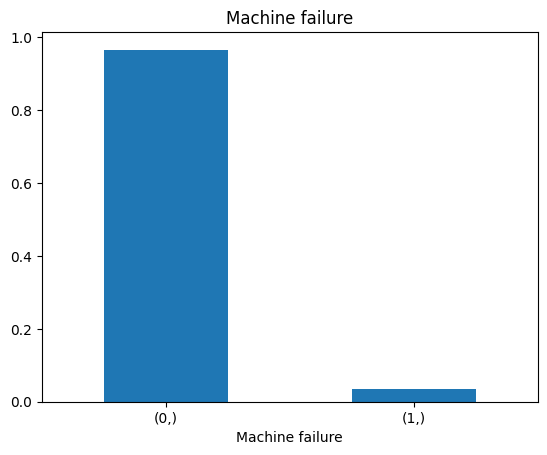

Machine failure
0                  96.61
1                   3.39
Name: proportion, dtype: float64


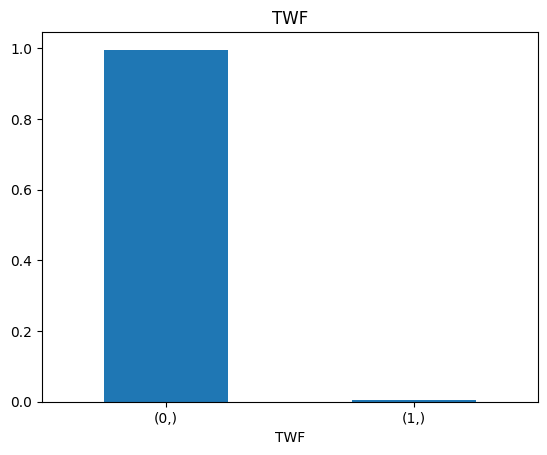

TWF
0      99.54
1       0.46
Name: proportion, dtype: float64


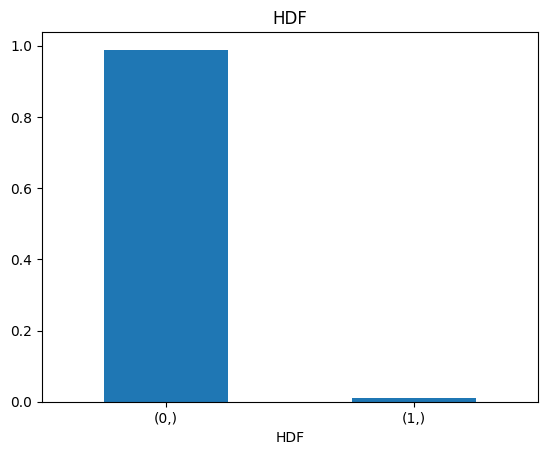

HDF
0      98.85
1       1.15
Name: proportion, dtype: float64


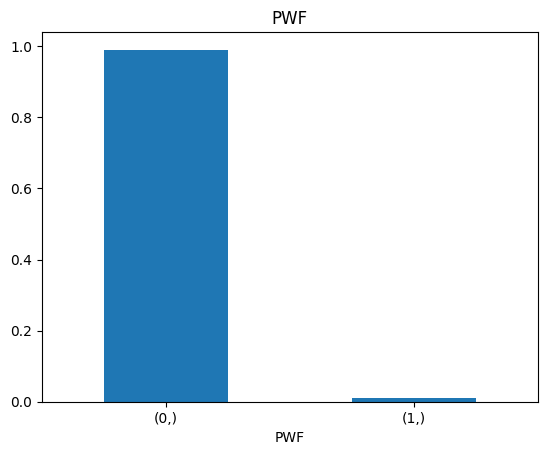

PWF
0      99.05
1       0.95
Name: proportion, dtype: float64


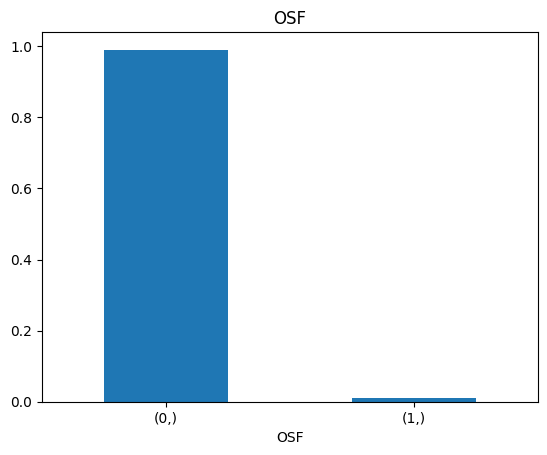

OSF
0      99.02
1       0.98
Name: proportion, dtype: float64


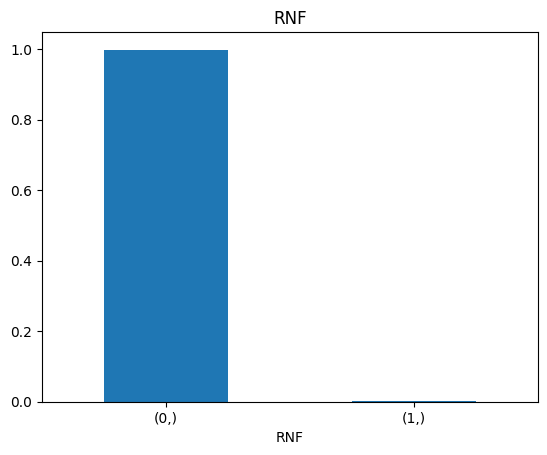

RNF
0      99.81
1       0.19
Name: proportion, dtype: float64


In [ ]:
for col in data.columns[-6:]:
    col_vals = data[[col]].value_counts(normalize=True)
    col_vals.plot(kind="bar", rot=0);
    plt.title(col)
    plt.show()
    print(col_vals*100)

TWF
0    99.54
1     0.46
Name: proportion, dtype: float64


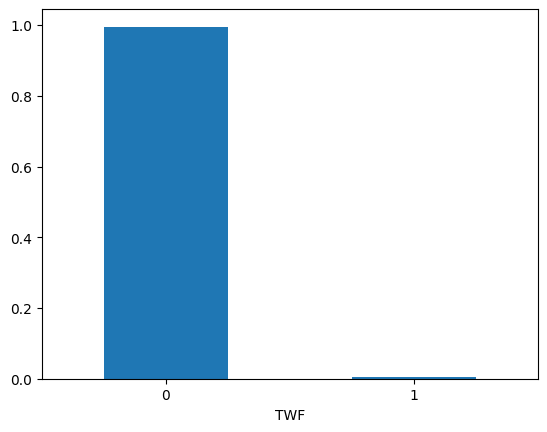

In [ ]:
twf_vals = data.TWF.value_counts(normalize=True)
twf_vals.plot(kind="bar", rot=0)
print(twf_vals * 100)

In [ ]:
X = data.drop(['Type','Product ID','Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF','UDI'], axis=1)
y = data['TWF']

## Splitting the dataset into the Training set and Test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print(X_train)

[[-0.85406604 -0.60958879  0.42763418 -0.89269644  1.37503539]
 [-0.90401361 -1.08052803 -0.83494457  1.38218727  0.45762016]
 [-0.90401361 -1.48419023 -0.05967692 -0.89269644  1.35921788]
 ...
 [ 1.39357475  1.54327629 -0.30887009  0.72076734  1.81792549]
 [-1.95291265 -2.08968354  0.01231222 -0.74237372 -1.18740025]
 [ 0.09493785  0.26501265  1.49085839 -1.42383669 -1.15576524]]


In [ ]:
print(y_train)

9254    0
1561    0
1670    0
6087    0
6669    0
       ..
5734    0
5191    0
5390    0
860     0
7270    0
Name: TWF, Length: 8000, dtype: int64


In [ ]:
print(X_test)

[[ 3.94623289e-01  1.97735612e-01 -4.30065887e-03 -3.91620730e-01
   1.42248790e+00]
 [ 1.79315534e+00  1.20689112e+00 -6.52202912e-01  4.80251001e-01
  -1.11809981e-01]
 [-8.54066042e-01 -1.41691320e+00 -2.97794842e-01  1.99648605e-01
   1.41270082e-01]
 ...
 [ 1.44885423e-01  1.13961409e+00 -1.22811603e+00  1.65276816e+00
  -1.59865535e+00]
 [-1.55333207e+00 -1.68602134e+00  6.54671101e+00 -3.07738652e+00
  -1.42466280e+00]
 [ 4.94518436e-01  1.07233705e+00 -1.31671804e+00  1.50244544e+00
  -1.56702034e+00]]


In [ ]:
print(y_test)

6252    0
4684    0
1731    0
4742    0
4521    0
       ..
6412    0
8285    0
7853    0
1095    0
6929    0
Name: TWF, Length: 2000, dtype: int64


## Feature Scaling

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
print(X_train)

[[2968 'L50147' 'L' ... 0 0 0]
 [701 'M15560' 'M' ... 0 0 0]
 [3482 'L50661' 'L' ... 0 0 0]
 ...
 [3265 'H32678' 'H' ... 0 0 0]
 [9846 'L57025' 'L' ... 0 0 0]
 [2733 'L49912' 'L' ... 0 0 0]]


## Training the K-NN model on the Training set

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

IndentationError: expected an indented block after function definition on line 14 (<ipython-input-137-14b5f6df992a>, line 15)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)#Metrik default adalah minkowski, dan dengan p=2 setara dengan metrik Euclidean standar.
classifier.fit(X_train, y_train) # Menyesuaikan classifier ke data pelatihan

KNeighborsClassifier()

## Predicting the Test set results

In [ ]:
y_pred = classifier.predict(X_test)
print("Hasil Prediksi:")
print(y_pred)

Hasil Prediksi:
[0 0 0 ... 0 0 0]


In [ ]:
predictions=model.predict(X_test)

KeyError: 0

## Visualising the Test set results

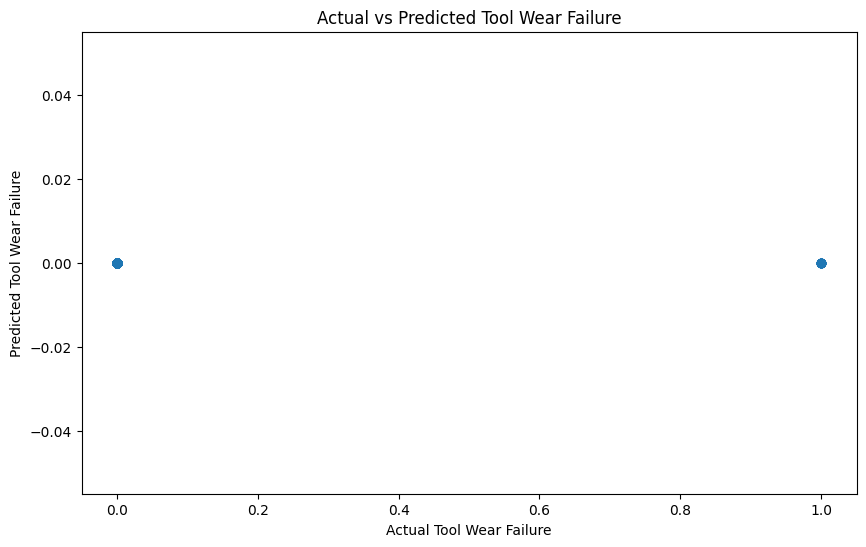

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Tool Wear Failure')
plt.ylabel('Predicted Tool Wear Failure')
plt.title('Actual vs Predicted Tool Wear Failure')
plt.show()

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1989
           1       0.00      0.00      0.00        11

    accuracy                           0.99      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.99      0.99      0.99      2000



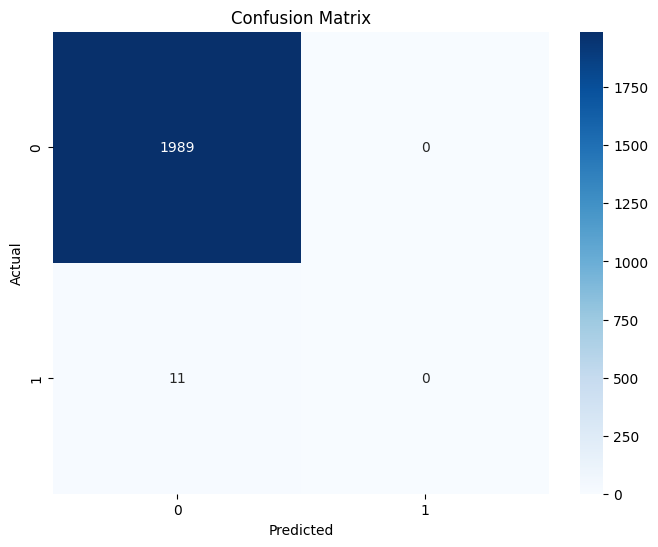

In [ ]:
# Konversi y_pred ke dalam format kategorikal
y_pred_cat = np.round(y_pred)

print(classification_report(y_test, y_pred_cat))

conf_matrix = confusion_matrix(y_test, y_pred_cat)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

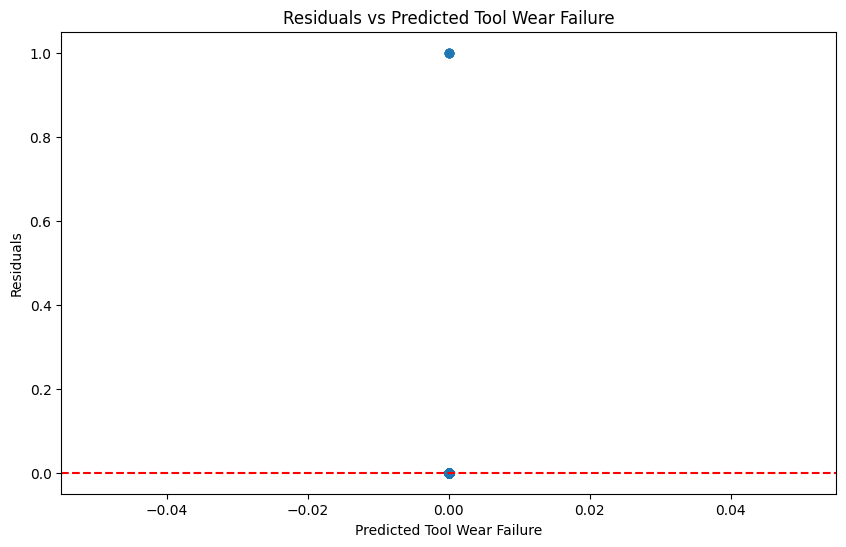

In [ ]:
# Menghitung residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Tool Wear Failure')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Tool Wear Failure')
plt.show()